In [1]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [9]:
import os
os.getcwd()

'C:\\Users\\82102'

In [10]:
os.chdir('C:\\Users\\82102')

In [11]:
train_path ="cat vs dog/train.zip" 
test_path = "cat vs dog/test1.zip"

files = "dataset"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)
    
with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

In [26]:
image_dir = "dataset/train"


filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [27]:
data[data['filename'] == 'cat.1000.jpg']

,filename,label
4,cat.1000.jpg,cat


In [28]:
import os
os.getcwd()

'C:\\Users\\82102'

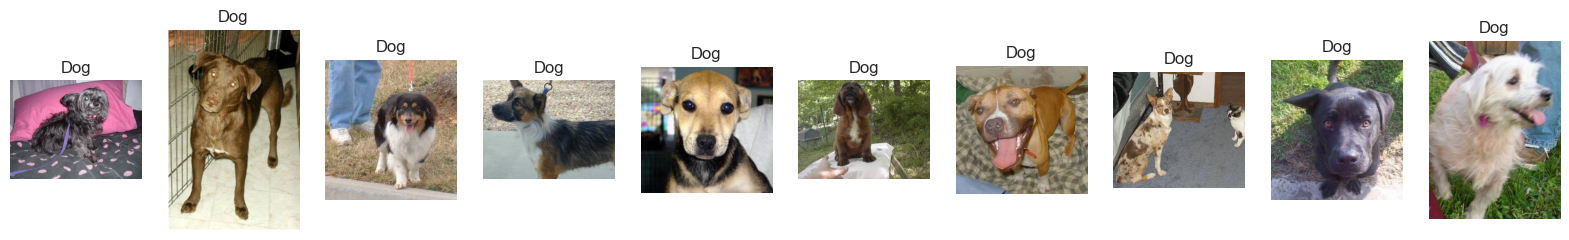

In [29]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'dataset/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

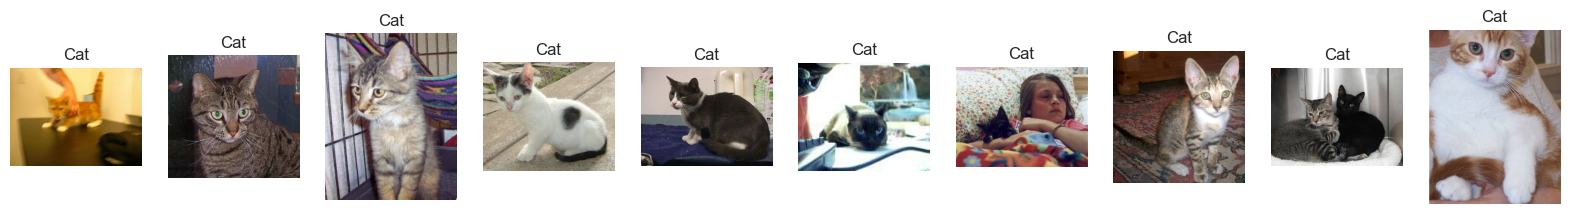

In [30]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'dataset/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

In [31]:

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2,  random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5,  random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20001, 2)
The shape of test data (2500, 2)
The shape of validation data (2501, 2)


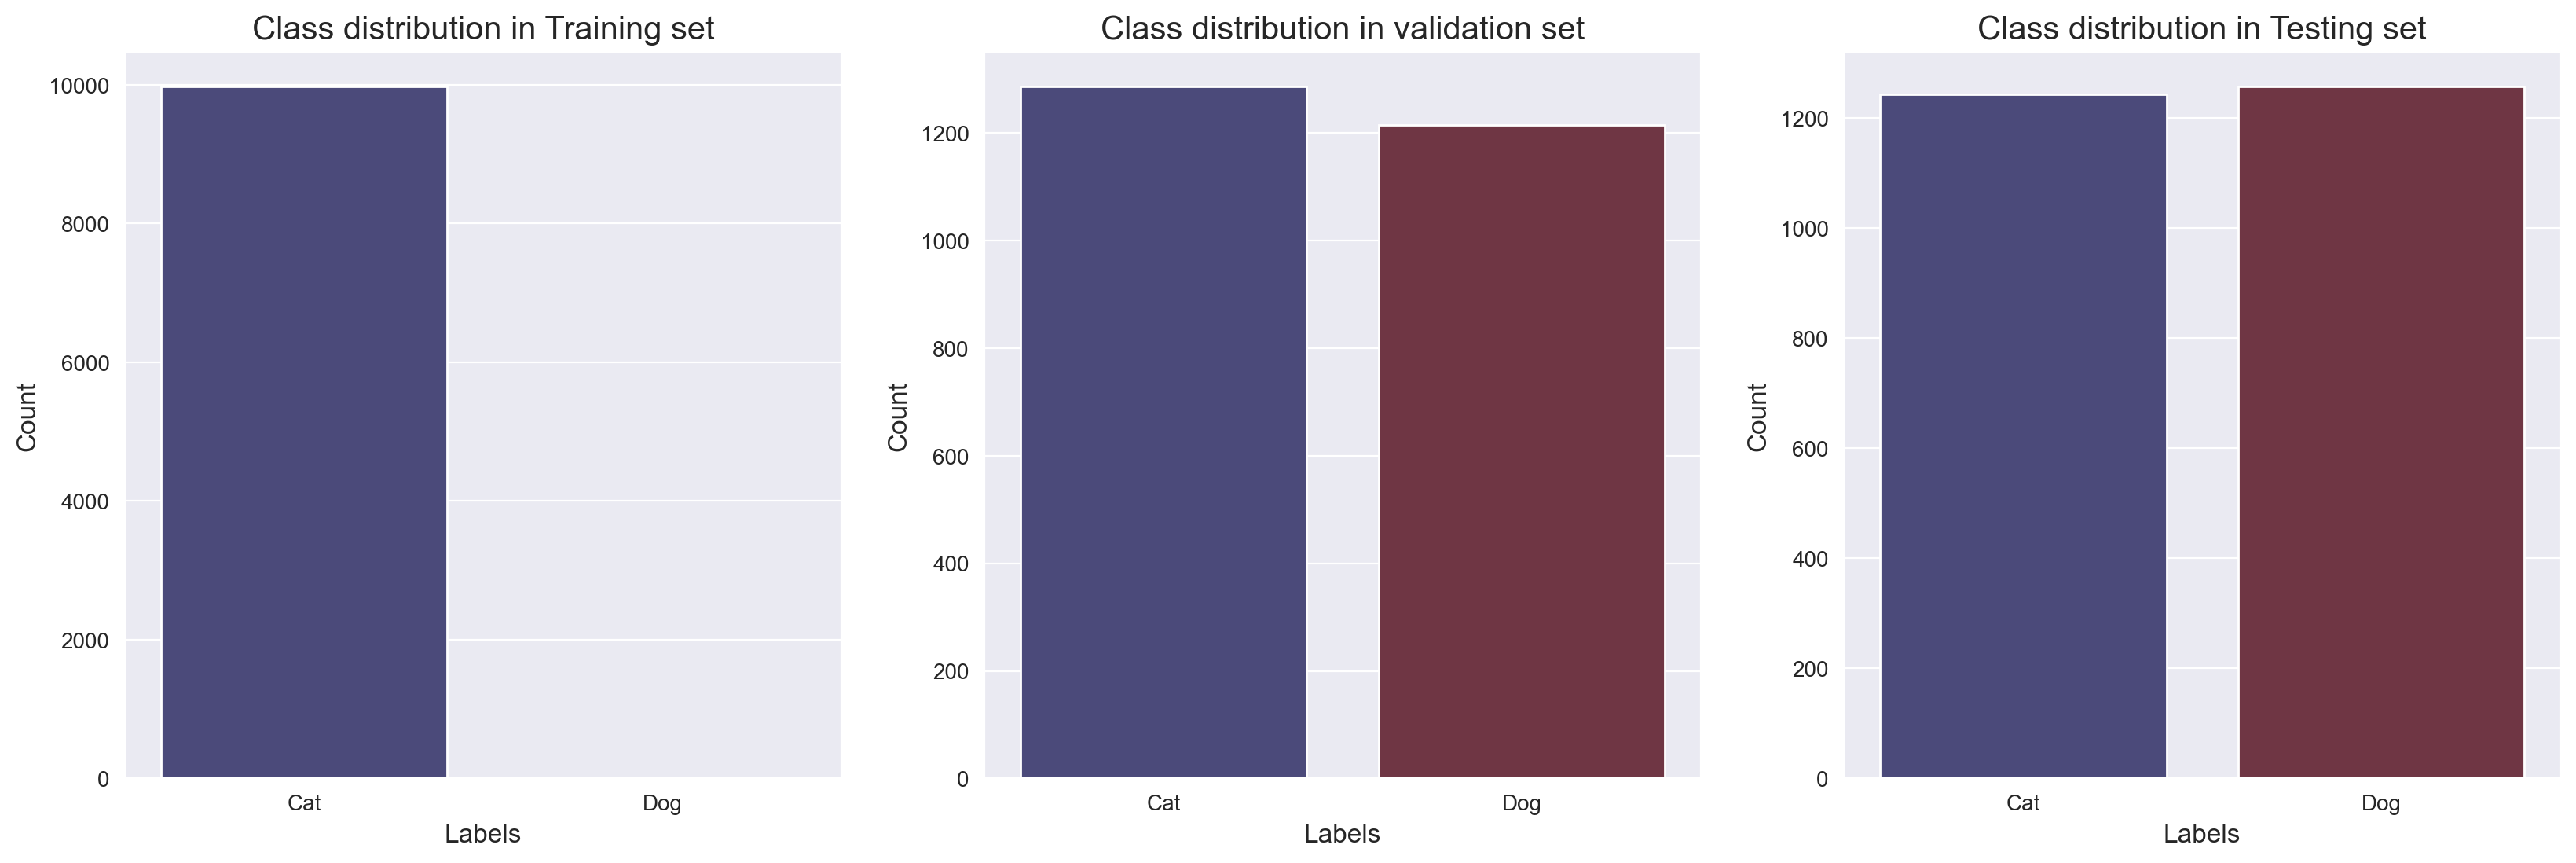

In [32]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)


# 'Cat'과 'Dog'의 카운트를 가져와서 데이터 프레임을 생성
uni1 = pd.DataFrame(data=[count1[0], count1[1]], index=labels, columns=['Count1'])
uni2 = pd.DataFrame(data=[count2[0], count2[1]], index=labels, columns=['Count2'])
uni3 = pd.DataFrame(data=[count3[0], count3[1]], index=labels, columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire').set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire').set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire').set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.savefig('save.png')
plt.show()


In [43]:
import os
from os import listdir
from random import seed, random
from shutil import copyfile

# Create directories
dataset_home = 'dataset/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # Create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)
        
        # Set write permissions (replace '0777' with the desired permission value)
        os.chmod(newdir, 0o777)

# Seed random number generator
seed(1)

# Define ratio of pictures to use for validation
val_ratio = 0.2

# Copy training dataset images into subdirectories
src_directory = 'dataset/train'


In [44]:
src_directory

'dataset/train'

In [45]:
from os.path import isfile, join


for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if isfile(src):  # 파일인지 확인
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/'  + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)


            
path1 = "dataset/train/cats"
path2 = "dataset/train/dogs"
path3 = "dataset/test/cats"
path4 = "dataset/test/dogs"
# path1 = os.path.join(dataset_home, "train/cats")
# path2 = os.path.join(dataset_home, "train/dogs")
# path3 = os.path.join(dataset_home, "test1/cats")
# path4 = os.path.join(dataset_home, "test1/dogs")

print('The number of cat images in the training data is', len(os.listdir(path1)))
print('The number of dog images in the training data is', len(os.listdir(path2)))
print('The number of cat images in the validation data is', len(os.listdir(path3)))
print('The number of dog images in the validation data is', len(os.listdir(path4)))


The number of cat images in the training data is 9946
The number of dog images in the training data is 9966
The number of cat images in the validation data is 2555
The number of dog images in the validation data is 2534


In [46]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

In [4]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

NameError: name 'ImageDataGenerator' is not defined

In [48]:
X_train

,filename,label
16248,dog.212.jpg,dog
695,cat.10622.jpg,cat
17155,dog.2937.jpg,dog
21826,dog.7140.jpg,dog
1020,cat.10915.jpg,cat
...,...,...
21575,dog.6915.jpg,dog
5390,cat.36.jpg,cat
860,cat.10771.jpg,cat
15795,dog.1712.jpg,dog


In [3]:

train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = 'dataset/train',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val, 
                                                 directory = '/dataset/val',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test, 
                                                  directory = '/dataset/test1',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

NameError: name 'train_datagen' is not defined

In [ ]:
train_gen = train_datagen.flow_from_directory('dataset/train' ,
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('dataset/test1', 
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

In [51]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [55]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.01,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator, 
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/30
625/625 [==============================] - 891s 1s/step - loss: 0.6310 - accuracy: 0.6762 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 888s 1s/step - loss: 0.4919 - accuracy: 0.7655 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 866s 1s/step - loss: 0.4062 - accuracy: 0.8147 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 865s 1s/step - loss: 0.3593 - accuracy: 0.8407 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 941s 2s/step - loss: 0.3238 - accuracy: 0.8597 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 936s 1s/step - loss: 0.3051 - accuracy: 0.8670 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 969s 2s/step - loss: 0.2821 - accuracy: 0.8795 - lr: 0.0010
Epoch 8/30
625/625 [==============================] - 954s 2s/step - loss: 0.2679 - accuracy: 0.8875 - lr: 0.0010
Epoch 9/30
448/625 [====================>.........] - ETA: 4:37 - loss: 0.2632 - accurac

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

In [ ]:
# Save the Model
model.save("model.h5")



In [ ]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

In [ ]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

In [ ]:

confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()